In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
try:
    df = pd.read_csv('AirQuality.csv', sep=';', decimal=',')
except FileNotFoundError:
    print("Make sure the 'AirQuality.csv' file is in the same directory as your script.")
    exit()


Preprocessing the Data

In [13]:
df = df.dropna(axis=1, how='all')  # Remove empty columns
df.dropna(how='all', inplace=True)  # Remove empty rows


In [14]:
df['Time'] = df['Time'].astype(str).str.replace('.', ':', regex=False)


In [15]:
#Combine 'Date' and 'Time' into 'DateTime'
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('DateTime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [16]:
#Replace placeholder -200 with NaN
df.replace(to_replace=-200, value=np.nan, inplace=True)


 Explore the dataset

In [17]:
print("Dataset Information:")
df.info()

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDescriptive Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB

First 5 rows of the dataset:
                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
DateTime               

Line Plot of CO Concentration Over Time

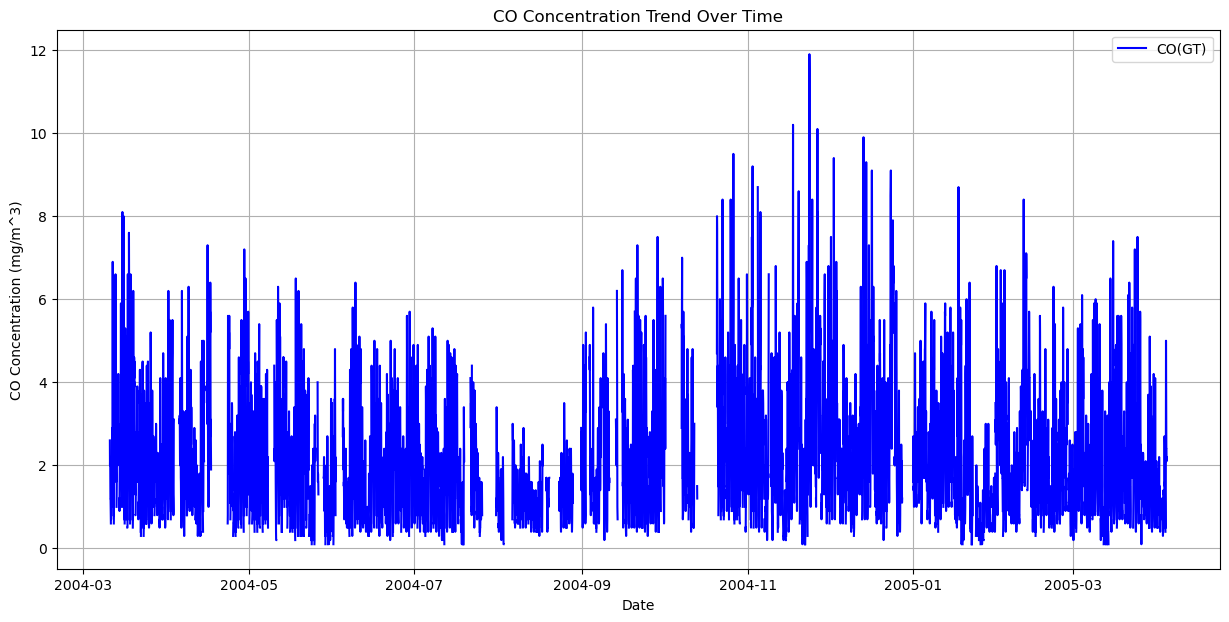

In [18]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', color='blue')
plt.title('CO Concentration Trend Over Time')
plt.xlabel('Date')
plt.ylabel('CO Concentration (mg/m^3)')
plt.legend()
plt.grid(True)
plt.show()


Subplots for Individual Pollutants

In [19]:
# List of pollutant columns
pollutant_columns = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Fill missing values temporarily for plotting
df[pollutant_columns] = df[pollutant_columns].fillna(method='ffill')


C:\Users\dnyan\AppData\Local\Temp\ipykernel_10384\1516319484.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[pollutant_columns] = df[pollutant_columns].fillna(method='ffill')


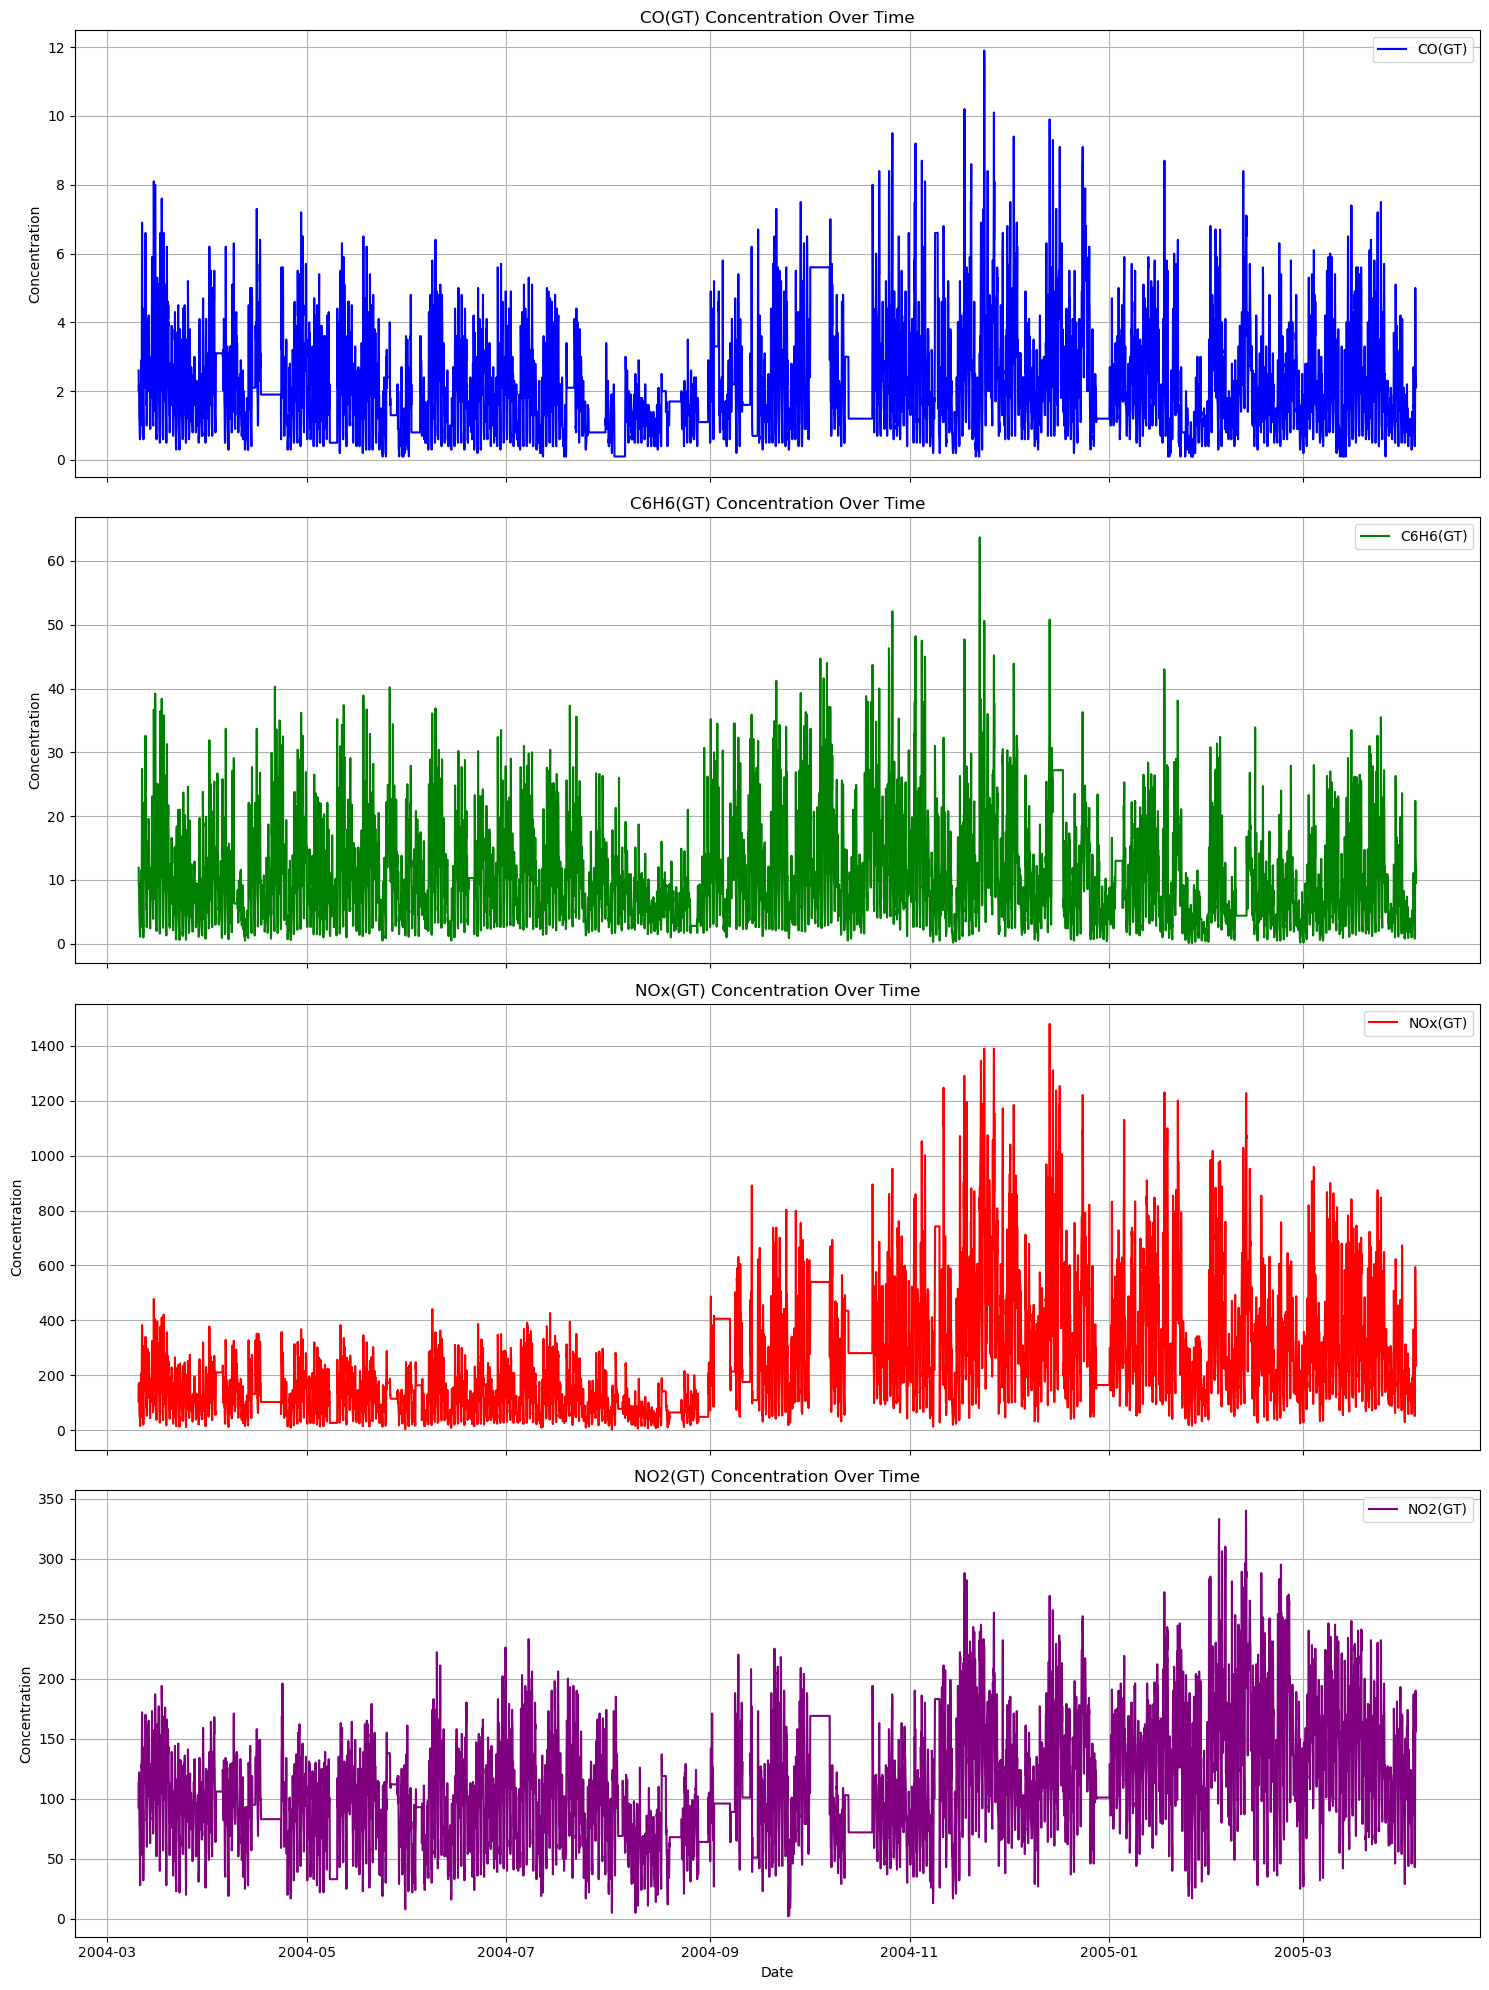

In [20]:
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)
colors = ['blue', 'green', 'red', 'purple']

for ax, pollutant, color in zip(axes, pollutant_columns, colors):
    ax.plot(df.index, df[pollutant], color=color, label=pollutant)
    ax.set_title(f'{pollutant} Concentration Over Time')
    ax.set_ylabel('Concentration')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

 Bar plot for daily average CO concentration

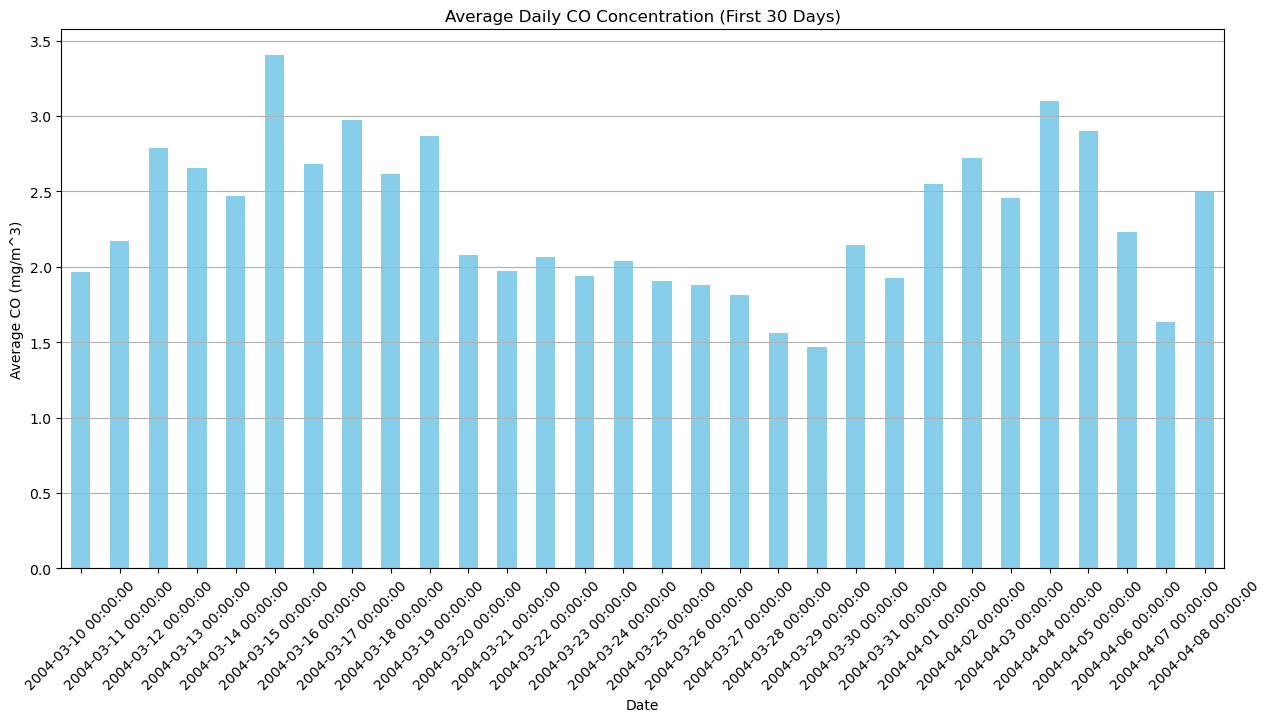

In [21]:
daily_co = df['CO(GT)'].resample('D').mean()
plt.figure(figsize=(15, 7))
daily_co.head(30).plot(kind='bar', color='skyblue')
plt.title('Average Daily CO Concentration (First 30 Days)')
plt.xlabel('Date')
plt.ylabel('Average CO (mg/m^3)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

 Box plot for pollutant distribution

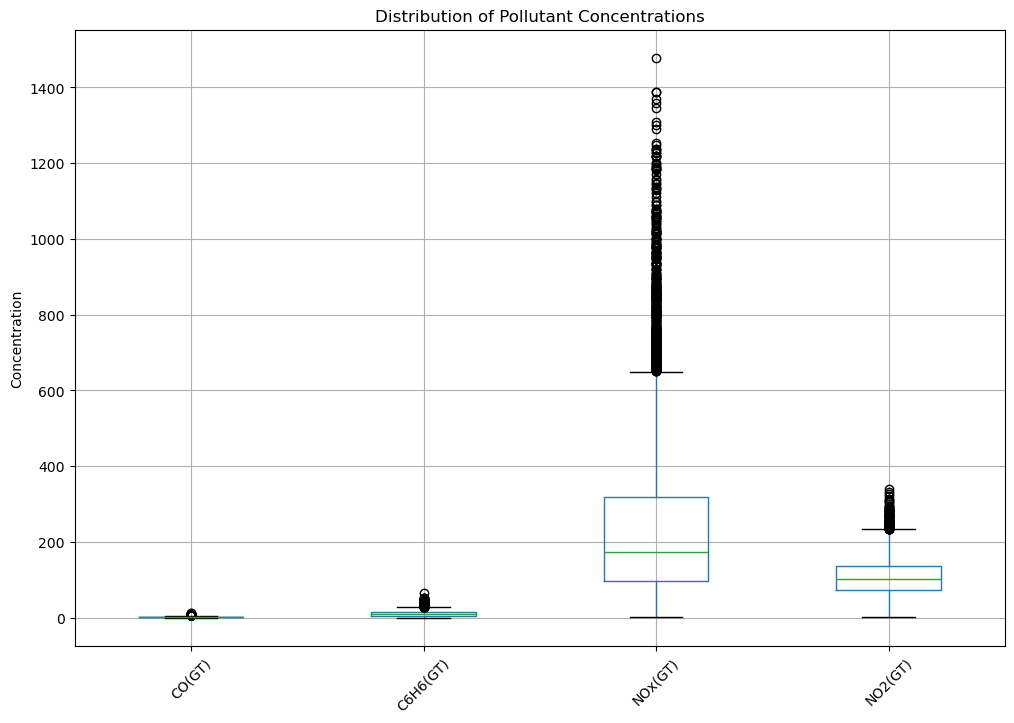

In [22]:
plt.figure(figsize=(12, 8))
df[pollutant_columns].boxplot()
plt.title('Distribution of Pollutant Concentrations')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()

 Scatter plot CO(GT) vs C6H6(GT)

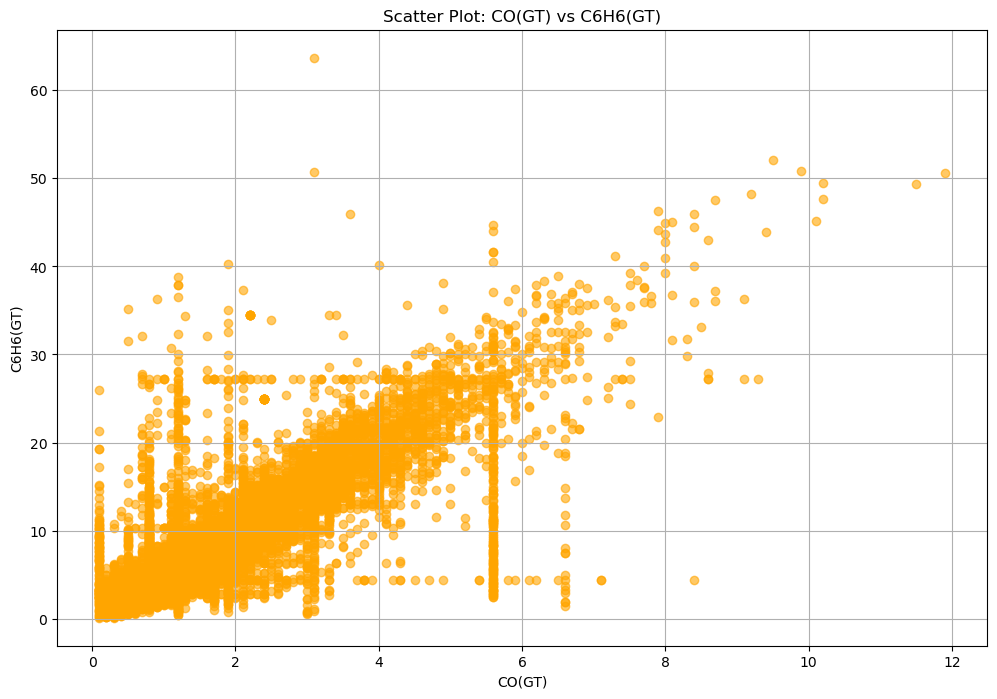

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(df['CO(GT)'], df['C6H6(GT)'], color='orange', alpha=0.6)
plt.title('Scatter Plot: CO(GT) vs C6H6(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('C6H6(GT)')
plt.grid(True)
plt.show()